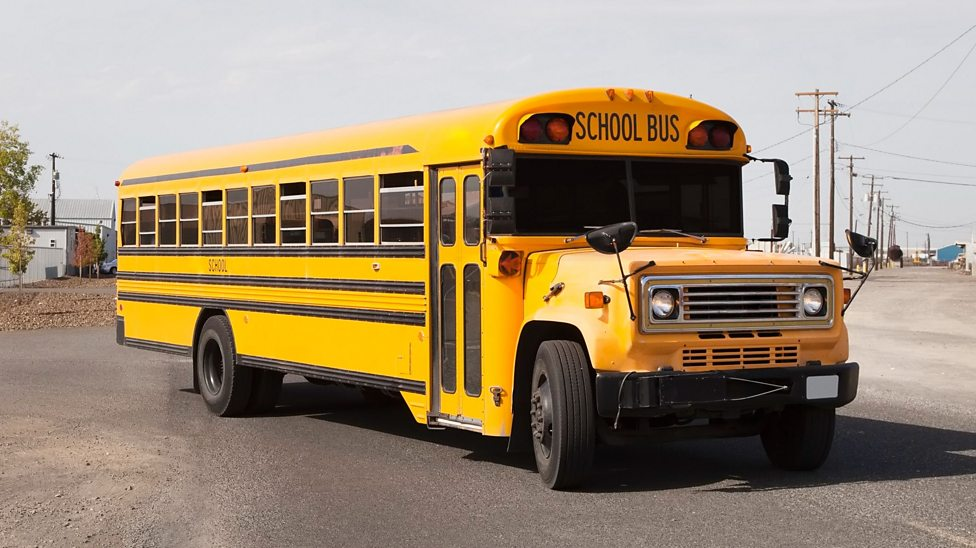

Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a **maximum score of 800 points**. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend. 

In [1]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Read in the Netflix CSV as a DataFrame
file_path = "C:\\Users\\jonas\\Documents\\MeusProjetos\\BootCamp\Datacamp - Data Scientist Associate\\03 - Data Manipulation with pandas\\05 Exploring NYC Public School Test Result Scores\\datalab_export_2025-01-29 21_20_34.csv"

schools = pd.read_csv(file_path)

<>:8: SyntaxWarning: invalid escape sequence '\D'
<>:8: SyntaxWarning: invalid escape sequence '\D'
C:\Users\jonas\AppData\Local\Temp\ipykernel_45316\925342385.py:8: SyntaxWarning: invalid escape sequence '\D'
  file_path = "C:\\Users\\jonas\\Documents\\MeusProjetos\\BootCamp\Datacamp - Data Scientist Associate\\03 - Data Manipulation with pandas\\05 Exploring NYC Public School Test Result Scores\\datalab_export_2025-01-29 21_20_34.csv"


In [2]:
#Let's check the data frame
schools.head()

,index,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


Which NYC schools have the best math results?

* The best math results are at least 80% of the *maximum possible score of 800* for math.
* Save your results in a pandas DataFrame called best_math_schools, including "school_name" and "average_math" columns, sorted by "average_math" in descending order.


In [3]:
best_math_schools = schools[schools["average_math"] > 640][["school_name", "average_math"]].sort_values(by="average_math", ascending=False)
best_math_schools

,school_name,average_math
88,Stuyvesant High School,754
170,Bronx High School of Science,714
93,Staten Island Technical High School,711
365,Queens High School for the Sciences at York Co...,701
68,"High School for Mathematics, Science, and Engi...",683
280,Brooklyn Technical High School,682
333,Townsend Harris High School,680
174,High School of American Studies at Lehman College,669
0,"New Explorations into Science, Technology and ...",657
45,Eleanor Roosevelt High School,641


What are the top 10 performing schools based on the combined SAT scores?

* Save your results as a pandas DataFrame called top_10_schools containing the "school_name" and a new column named "total_SAT", with results ordered by "total_SAT" in descending order ("total_SAT" being the sum of math, reading, and writing scores).

In [4]:
schools["total_SAT"] = schools["average_math"] + schools["average_reading"] + schools["average_writing"]
top_10_schools = schools[["school_name", "total_SAT"]].sort_values(by="total_SAT", ascending=False)
top_10_schools

,school_name,total_SAT
88,Stuyvesant High School,2144
170,Bronx High School of Science,2041
93,Staten Island Technical High School,2041
174,High School of American Studies at Lehman College,2013
333,Townsend Harris High School,1981
...,...,...
171,Kingsbridge International High School,987
337,Pan American International High School,978
295,International High School at Prospect Heights,946
247,Multicultural High School,926


Which single borough has the largest standard deviation in the combined SAT score?

* Save your results as a pandas DataFrame called largest_std_dev.
* The DataFrame should contain one row, with:

    - "borough" - the name of the NYC borough with the largest standard deviation of "total_SAT".
    - "num_schools" - the number of schools in the borough.
    - "average_SAT" - the mean of "total_SAT".
    - "std_SAT" - the standard deviation of "total_SAT".

Round all numeric values to two decimal places.

In [5]:
# Find the borough with the largest standard deviation in total_SAT
borough_with_largest_std = schools.groupby("borough")["total_SAT"].std().sort_values(ascending=False).idxmax()
borough_with_largest_std 

'Manhattan'

In [6]:
# Get the number of schools in that borough
num_schools = schools[schools["borough"] == "Manhattan"].shape[0]
num_schools

89

In [7]:
# Calculate the mean of total_SAT for that borough
average_SAT = schools[schools["borough"] == "Manhattan"]["total_SAT"].mean()
average_SAT

np.float64(1340.1348314606741)

In [8]:
# Calculate the standard deviation of total_SAT for that borough
std_SAT = schools[schools["borough"] == borough_with_largest_std]["total_SAT"].std()
std_SAT 

np.float64(230.29413953637814)

In [9]:
# Create a DataFrame to store the results with one row
largest_std_dev = pd.DataFrame({
    "borough": [borough_with_largest_std],
    "num_schools": [num_schools],
    "average_SAT": [round(average_SAT, 2)],
    "std_SAT": [round(std_SAT, 2)]
})
largest_std_dev

,borough,num_schools,average_SAT,std_SAT
0,Manhattan,89,1340.13,230.29
